In [15]:
import geopandas as gpd

lakes_gdf = gpd.read_file('Data/NH_Wildlife_Action_Plan_2020_-_Aquatic_Habitat_(Lakes_Ponds).geojson')
wetlands_gdf = gpd.read_file('Data/NH_Wetlands_Geopackage.gpkg')

C:\Users\curti\anaconda3\Lib\site-packages\geopandas\io\file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")


In [16]:
# Check CRS
print("Lakes CRS:", lakes_gdf.crs)
print("Wetlands CRS:", wetlands_gdf.crs)

# Reproject wetlands to match lakes CRS if they differ
if lakes_gdf.crs != wetlands_gdf.crs:
    wetlands_gdf = wetlands_gdf.to_crs(lakes_gdf.crs)


Lakes CRS: EPSG:4326
Wetlands CRS: PROJCS["NAD_1983_Albers",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [18]:
wetlands_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [21]:
lakes_gdf = lakes_gdf.to_crs("EPSG:3857")

In [22]:
lakes_gdf.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [23]:
lakes_gdf

,OBJECTID,Permanent_,FDate,Resolution,GNIS_ID,GNIS_Name,Elevation,ReachCode,NHFGID,Acres,...,Hab_guide,NHLAKECLASS,SPPCONCERN,HerringStock,WAPSPECIES,BridleShiner,EBT,Shape_Length,Shape_Area,geometry
0,1,135911428,2005-05-30 00:00:00+00:00,2.0,00865984,Canobie Lake,66.0,01070006001700,1,375.079270,...,https://easterndivision.s3.amazonaws.com/Fresh...,warm/cool Lake,P,N,BDS,N,N,30160.838492,1.633775e+07,"POLYGON ((-7931458.357 5281493.316, -7931458.3..."
1,2,135999029,2005-06-03 00:00:00+00:00,2.0,00867486,Highland Lake,394.0,01070003001395,2,696.567601,...,https://easterndivision.s3.amazonaws.com/Fresh...,warm/cool Lake,N,N,,N,N,104138.838593,3.034122e+07,"POLYGON ((-8024729.029 5327157.846, -8024708.1..."
2,3,76910235,2009-09-10 00:00:00+00:00,2.0,00871403,"Armington, Lake",409.0,01080104002175,3,152.290770,...,https://easterndivision.s3.amazonaws.com/Fresh...,warm/cool Lake,N,N,,N,N,17949.879143,6.633413e+06,"POLYGON ((-8012009.287 5458891.607, -8012000.0..."
3,4,92797697,2003-08-04 00:00:00+00:00,2.0,00870846,White Oak Pond,178.0,01070001001186,4,294.759365,...,https://easterndivision.s3.amazonaws.com/Fresh...,warm/cool Lake,N,N,,N,N,26406.131271,1.283883e+07,"POLYGON ((-7966791.672 5420843.059, -7966782.4..."
4,5,135908715,2005-05-30 00:00:00+00:00,2.0,00869253,Pleasant Lake,176.0,01070006002402,5,478.901845,...,https://easterndivision.s3.amazonaws.com/Fresh...,warm/cool Lake,N,N,,N,N,24571.317108,2.086004e+07,"POLYGON ((-7932395.337 5339748.024, -7932450.3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15645,15646,{1B4D03BE-137D-42BC-9550-8EEFDB831C45},2019-02-27 00:00:00+00:00,2.0,,,0.0,01060003013351,15648,3.667919,...,None,warm/cool Pond,N,N,,N,N,1747.681543,1.597739e+05,"POLYGON ((-7878694.461 5316161.737, -7878682.3..."
15646,15647,{D4BBA0D8-195F-4007-A067-F02EF6D1308B},2019-02-27 00:00:00+00:00,2.0,,,0.0,01060003013355,15649,2.136736,...,None,warm/cool Pond,N,N,,N,N,1235.842555,9.307585e+04,"POLYGON ((-7904845.492 5312958.308, -7904841.1..."
15647,15648,{0099D427-6989-4ACA-9C26-0221B5F5EBE9},2019-02-27 00:00:00+00:00,2.0,,,0.0,01060003013326,15650,7.633106,...,None,warm/cool Pond,N,N,,N,N,3381.663397,3.324967e+05,"POLYGON ((-7917679.253 5378031.849, -7917706.2..."
15648,15649,{79439CA7-D11F-4866-A280-13FF3183DFE0},2019-02-27 00:00:00+00:00,2.0,,,0.0,01060003013350,15651,2.943044,...,None,warm/cool Pond,N,N,,N,N,1546.444710,1.281985e+05,"POLYGON ((-7879011.230 5316235.111, -7878979.8..."


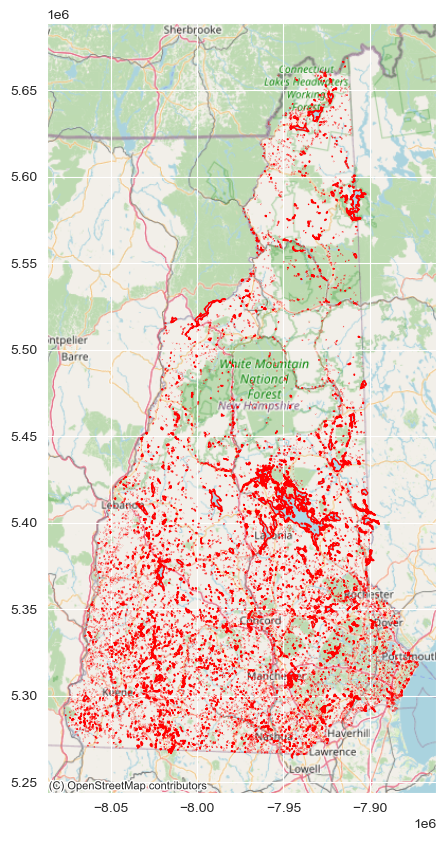

In [43]:
import matplotlib.pyplot as plt
import contextily as ctx
fig, ax = plt.subplots(figsize=(10, 10))

lakes_gdf.plot(ax=ax, color='lightblue', edgecolor='red', label='Lakes')
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()

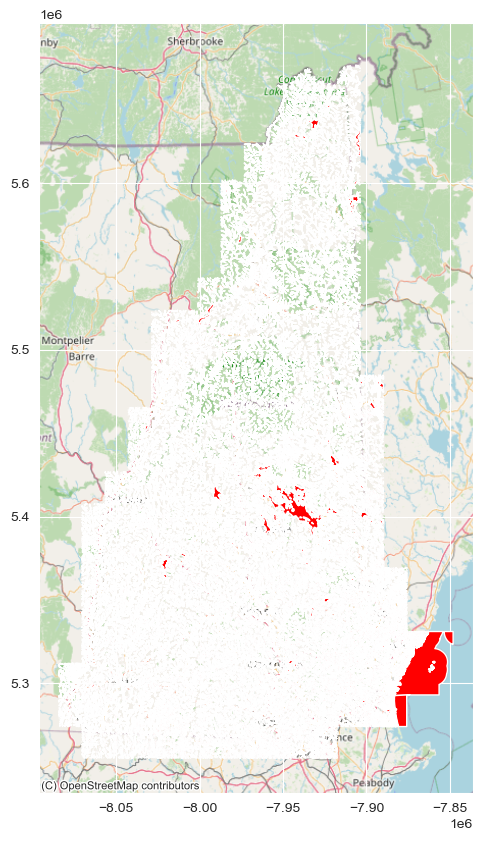

In [49]:
fig1, ax1 = plt.subplots(figsize=(10, 10))

wetlands_gdf.plot(ax=ax1, figsize=(10, 10), color="red")
ctx.add_basemap(ax=ax1, source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()

In [51]:
lakes = wetlands_gdf[wetlands_gdf['WETLAND_TYPE'] == "Lake"]

In [27]:
wetlands_gpkg_path = "Data/NH_Wetlands_Geopackage.gpkg"

layers = gpd.io.file.fiona.listlayers(wetlands_gpkg_path)

In [28]:
print("Available layers:", layers)

Available layers: ['New_Hampshire', 'NH_Wetlands_Historic_Map_Info', 'NH_Wetlands_Project_Metadata', 'NH_Wetlands']


In [29]:
wetlands_gdf = gpd.read_file(wetlands_gpkg_path, layer='NH_Wetlands')

In [34]:
wetlands_gdf = wetlands_gdf.to_crs("EPSG:3857")

In [ ]:
wetlands_gdf

In [52]:
lakes

,ATTRIBUTE,WETLAND_TYPE,ACRES,NWI_ID,geometry
0,L1UBH,Lake,51.356344,202409CSw{D91EC9A6-D26F-481B-AB64-124F1AA091A0...,"MULTIPOLYGON (((-7972298.749 5623063.785, -797..."
344,L1UBH,Lake,28.355885,202409CSw{C99BF748-D4CB-4879-BB3C-586618206B65...,"MULTIPOLYGON (((-7905332.397 5654791.252, -790..."
345,L1UBHh,Lake,37.149631,202409CSw{645666E6-2F7B-432A-BE11-D79D04BBBB27...,"MULTIPOLYGON (((-7904908.295 5670337.137, -790..."
1147,L1UBH,Lake,10.306705,202409CSw{69A83213-FA25-4BD3-BFF0-E7A9BEE16F36...,"MULTIPOLYGON (((-7903899.603 5642628.244, -790..."
1162,L1UBHh,Lake,3446.143120,202409CSw{F5FA1911-9903-4481-BF99-58B34A486824...,"MULTIPOLYGON (((-7903724.699 5632470.118, -790..."
...,...,...,...,...,...
258693,L2ABH,Lake,91.632162,202409CSw{629B0F59-AC7B-4CBB-A224-1E1BEF555EF2...,"MULTIPOLYGON (((-8064964.463 5285291.776, -806..."
258716,L2EM2F,Lake,4.151259,202409CSw{3A2EB4A6-363B-41A8-987C-A775C4672A85...,"MULTIPOLYGON (((-8062793.793 5289240.624, -806..."
258725,L2ABHb,Lake,27.809847,202409CSw{3A9585BE-9921-424B-B31C-4CCB9AA575DC...,"MULTIPOLYGON (((-8062009.973 5334422.124, -806..."
258746,L2ABHb,Lake,18.916084,202409CSw{F84C13BC-EE07-442F-9DA1-035EE3AE6276...,"MULTIPOLYGON (((-8044158.176 5347617.844, -804..."
